# **Week 2: G2M Insight for Cab Investment Firmy**

**Project Description:** This task is to find out for a private firm in the US cab company to identify the right company to invest in. For this, market research will be made, and will be identified the right company among the two cab companies.


Steps for data analysis:
* Investigation of data sets and joined
* EDA and Visualisation
* Hypothesis tests

\
Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

\
*Submitted By: Ece Yavuzyılmaz*

# **Investigation of data sets and joined**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
cab_data = pd.read_csv('datasets/Cab_Data.csv')
city_data = pd.read_csv('datasets/City.csv')
customer_data = pd.read_csv('datasets/Customer_ID.csv')
transaction_data = pd.read_csv('datasets/Transaction_ID.csv')

*1-Investigation the first dataset(cab_data)*

In [ ]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [ ]:
import datetime

In [ ]:
#  convert the 'Date' column to datetime format
def ordinary_date(x):
    temp = datetime.datetime(1900, 1, 1)
    delta = datetime.timedelta(x)
    return temp+delta

In [ ]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:ordinary_date(x))
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
#add 'Profit' column
cab_data['Profit'] = pd.DataFrame(cab_data["Price Charged"] - cab_data["Cost of Trip"])
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [ ]:
cab_data['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [ ]:
cab_data['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [ ]:
#grouping of cities by state
cab_data['State'] = cab_data['City'].str.split().str[-1]
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,GA
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,GA
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,GA
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,GA
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,GA


In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
cab_data['State'].value_counts()

NY        99885
CA        70888
IL        56625
DC        43737
MA        29692
TX        11913
VALLEY     8519
WA         7997
GA         7557
FL         6454
AZ         3995
COUNTY     3982
CO         3825
TN         3010
PA         1313
Name: State, dtype: int64

In [ ]:
cab_data['State']=cab_data['State'].replace('VALLEY','CA').replace('COUNTY','CA')
cab_data['State'].value_counts()

NY    99885
CA    83389
IL    56625
DC    43737
MA    29692
TX    11913
WA     7997
GA     7557
FL     6454
AZ     3995
CO     3825
TN     3010
PA     1313
Name: State, dtype: int64

In [ ]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000


2-Investigation the second dataset(city_data)

In [ ]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
#Changing the data type
city_data['Population'] = city_data['Population'].apply(lambda x:x.replace(",",""))
city_data['Users'] = city_data['Users'].apply(lambda x:x.replace(",",""))

city_data['Population']=city_data['Population'].astype("int64")
city_data['Users']=city_data['Users'].astype("int64")

city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [ ]:
city_data.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [ ]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


3-Investigation the third dataset(customer_data)

In [ ]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [ ]:
customer_data['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [ ]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


4-Investigation the forth dataset(transaction_data)

In [ ]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
transaction_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [ ]:
transaction_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [ ]:
transaction_data['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [ ]:
transaction_data.shape

(440098, 3)

In [ ]:
cab_data.shape

(359392, 9)

In [ ]:
customer_data.shape

(49171, 4)

In [ ]:
city_data.shape

(20, 3)

In [ ]:
#merge the whole dataset
#firtly we can merge cab_data and transaction_data by'Trancastion ID', and cab_data and city_data by 'City'
data_1= cab_data.merge(transaction_data, on = "Transaction ID").merge(city_data, on="City")
data_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State,Customer ID,Payment_Mode,Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,GA,29290,Card,814885,24701
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,GA,27703,Card,814885,24701
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,GA,28712,Cash,814885,24701
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,GA,28020,Cash,814885,24701
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,GA,27182,Card,814885,24701


In [ ]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [ ]:
#Secondly we can merge all data by 'Customer ID' 
all_data= data_1.merge(customer_data, on="Customer ID")
all_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,GA,29290,Card,814885,24701,Male,28,10813
1,10351127,2018-07-23,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,GA,29290,Cash,814885,24701,Male,28,10813
2,10412921,2018-11-25,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,GA,29290,Card,814885,24701,Male,28,10813
3,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,GA,27703,Card,814885,24701,Male,27,9237
4,10320494,2018-04-23,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,GA,27703,Card,814885,24701,Male,27,9237


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Profit              359392 non-null  float64       
 8   State               359392 non-null  object        
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Population          359392 non-null  int64         
 12  Users               359392 non-null  int64         
 13  Gender              359392 no

# **EDA and Visualisation**

In [ ]:
all_data.nunique()

Transaction ID        359392
Date of Travel          1095
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Profit                301825
State                     13
Customer ID            46148
Payment_Mode               2
Population                19
Users                     19
Gender                     2
Age                       48
Income (USD/Month)     22725
dtype: int64

In [ ]:
all_data.describe(include='all').T

<ipython-input-43-0f6e21de7b8c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,NaN,NaN,NaN,NaT,NaT,10220761.185363,126805.803715,10000011.0,10110809.75,10221035.5,10330937.25,10440107.0
Date of Travel,359392,1095,2018-01-07 00:00:00,2022,2016-01-04,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company,359392,2,Yellow Cab,274681,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,359392,19,NEW YORK NY,99885,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM Travelled,359392.0,NaN,NaN,NaN,NaT,NaT,22.567254,12.233526,1.9,12.0,22.44,32.96,48.0
Price Charged,359392.0,NaN,NaN,NaN,NaT,NaT,423.443311,274.378911,15.6,206.4375,386.36,583.66,2048.03
Cost of Trip,359392.0,NaN,NaN,NaN,NaT,NaT,286.190113,157.993661,19.0,151.2,282.48,413.6832,691.2
Profit,359392.0,NaN,NaN,NaN,NaT,NaT,137.253198,160.31184,-220.06,28.012,81.962,190.03,1463.966
State,359392,13,NY,99885,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,359392.0,NaN,NaN,NaN,NaT,NaT,19191.652115,21012.412463,1.0,2705.0,7459.0,36078.0,60000.0


In [ ]:
cate_cols=all_data.select_dtypes(include=['object']).columns
cate_cols

Index(['Company', 'City', 'State', 'Payment_Mode', 'Gender'], dtype='object')

In [ ]:
num_cols = all_data.select_dtypes(include=np.number).columns.tolist()
num_cols

['Transaction ID',
 'KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Profit',
 'Customer ID',
 'Population',
 'Users',
 'Age',
 'Income (USD/Month)']

In [ ]:
group = all_data.groupby('Company')['Profit'].sum().reset_index()
group.head()

,Company,Profit
0,Pink Cab,5.307328e+06
1,Yellow Cab,4.402037e+07


[Text(0, 0, '5.30733e+06'), Text(0, 0, '4.40204e+07')]

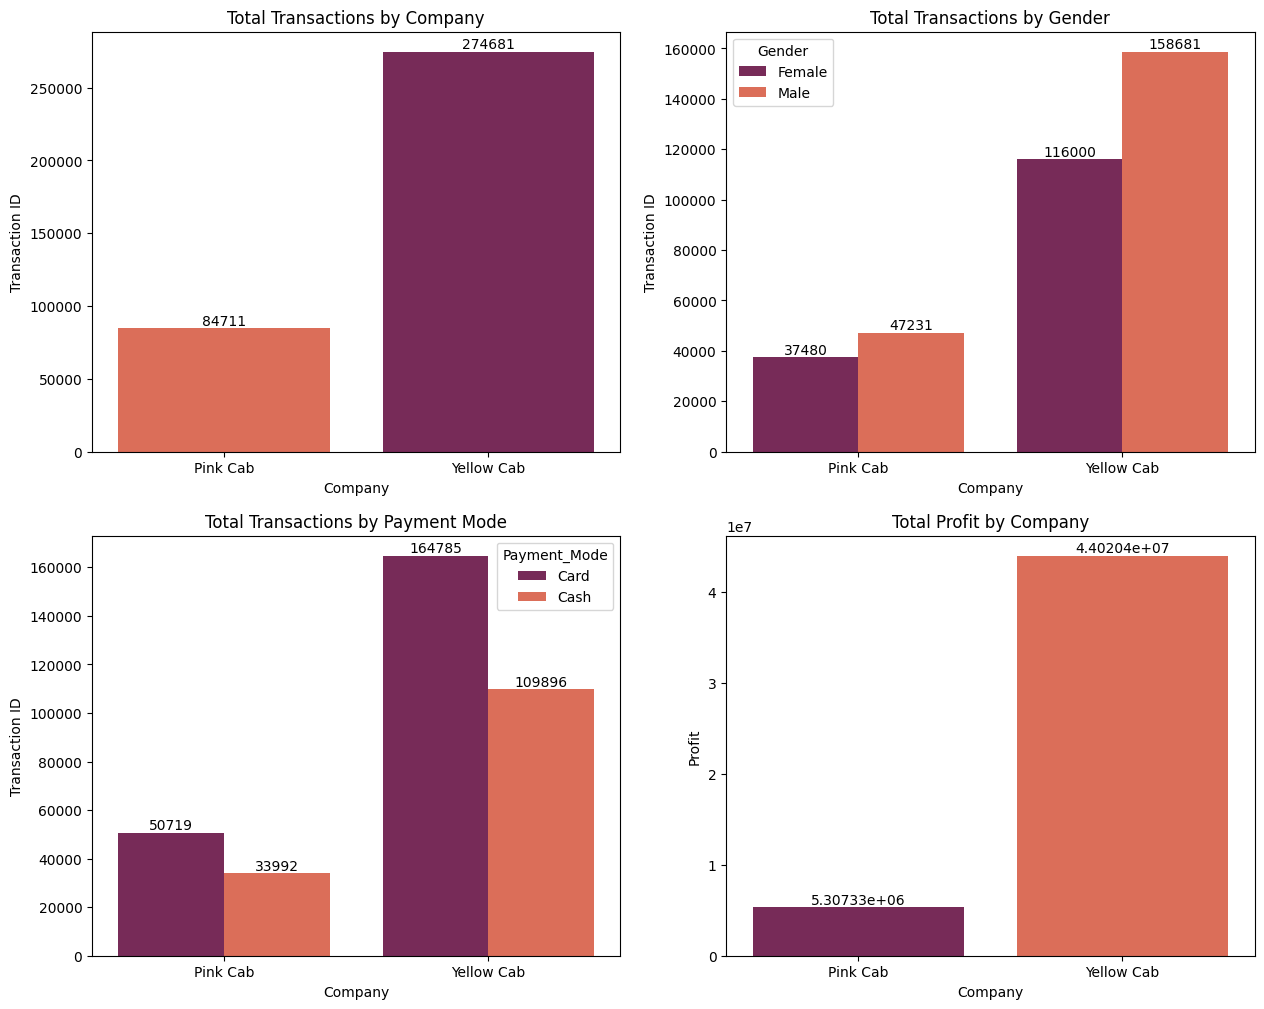

In [ ]:
fig = plt.figure(figsize=(15,12))

fig.add_subplot(2,2,1)
group = all_data.groupby('Company')['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x= 'Company', y= 'Transaction ID',palette="rocket_r")
plt.title("Total Transactions by Company")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])

fig.add_subplot(2,2,2)
group = all_data.groupby(by=['Company','Gender'])['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Gender", y='Transaction ID',palette="rocket")
plt.title("Total Transactions by Gender")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


fig.add_subplot(2,2,3)
group = all_data.groupby(by=['Company','Payment_Mode'])['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Payment_Mode", y='Transaction ID',palette="rocket")
plt.title("Total Transactions by Payment Mode")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

fig.add_subplot(2,2,4)
group = all_data.groupby(by=['Company'])['Profit'].sum().reset_index()
ax = sns.barplot(data =group, x="Company", y='Profit',palette="rocket")
plt.title("Total Profit by Company")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])

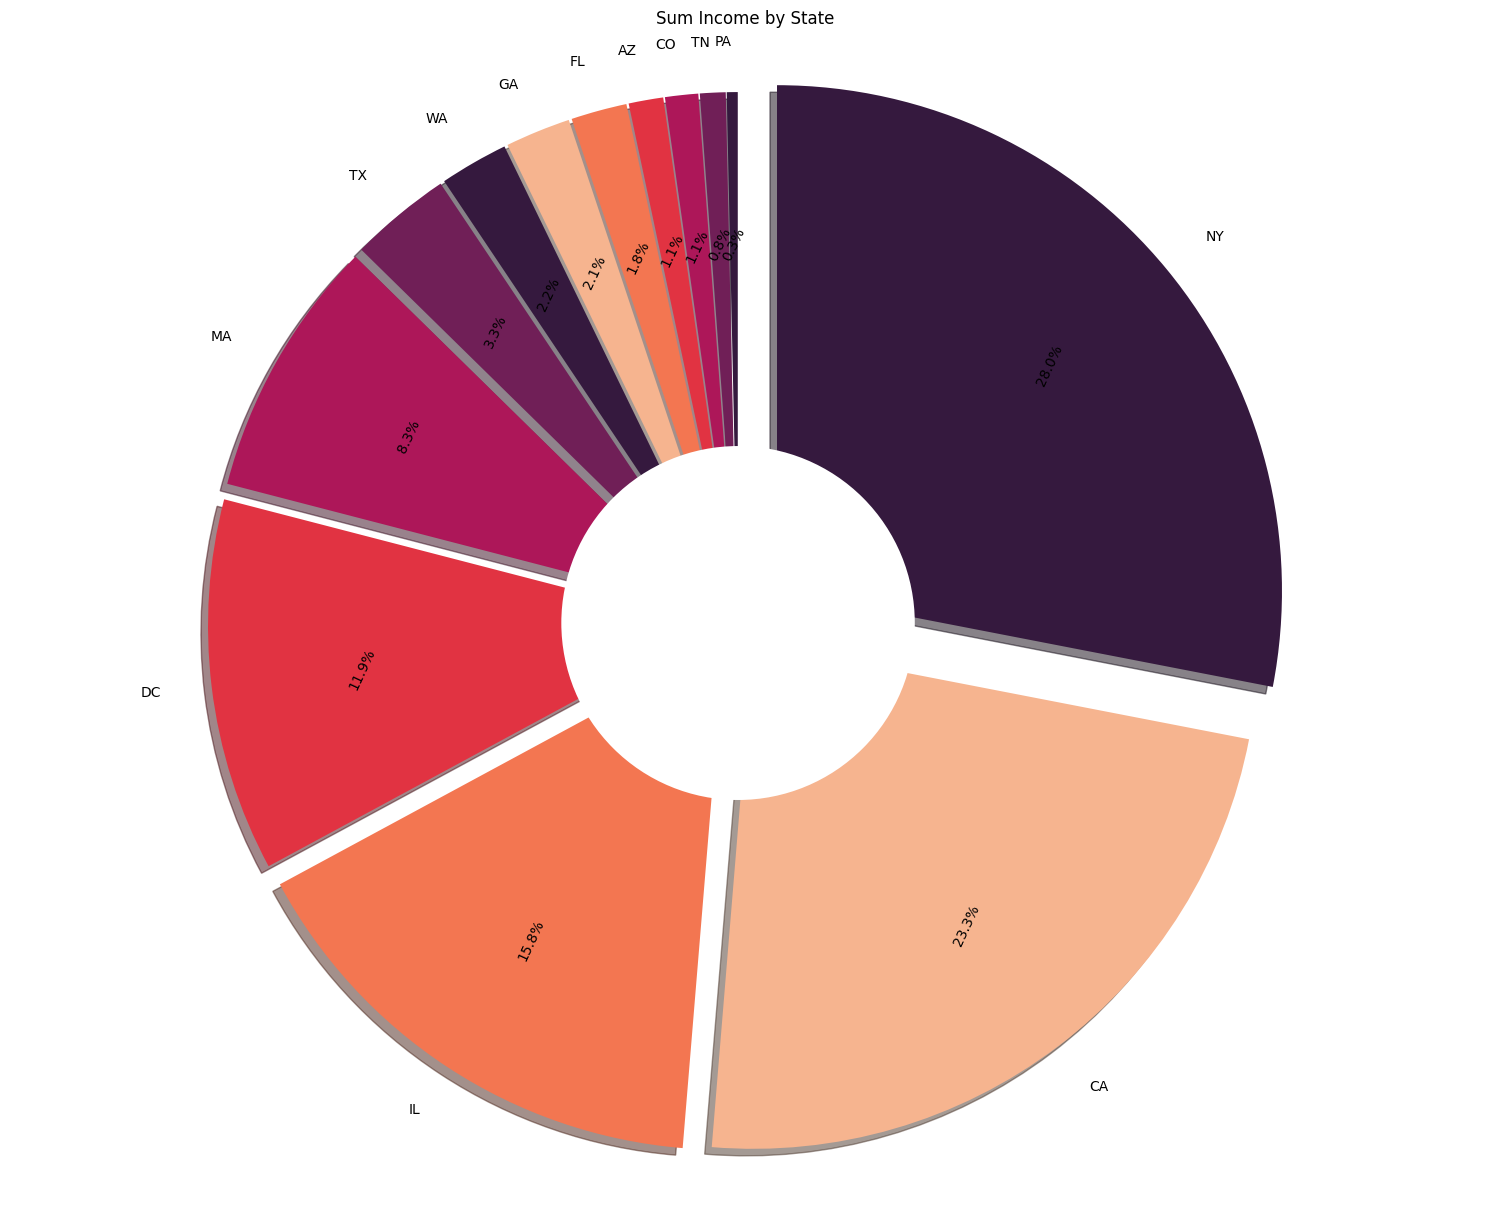

In [ ]:
state_income=all_data.groupby("State").agg({"Income (USD/Month)":"sum"}).sort_values('Income (USD/Month)').reset_index()
state_income.columns=['State','Income (USD/Month)']

fig, ax = plt.subplots(figsize=(15,12))

textprops = {"fontsize":10}
explodes = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2]
#explodes = [0.1, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

pie_properties=ax.pie(data=state_income, x='Income (USD/Month)', labels= 'State' , pctdistance=0.7, 
               autopct='%1.1f%%', 
               colors=sns.color_palette("rocket"),radius = 2,  
               explode = explodes, shadow=True, startangle=90 , textprops =textprops);

centre_circle=plt.Circle((0,0),0.70,fc='white')

fraction_text_list = pie_properties[2]
for text in fraction_text_list:
    text.set_rotation(65)
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.title ("Sum Income by State")

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'NEW YORK NY'),
  Text(1, 0, 'CHICAGO IL'),
  Text(2, 0, 'LOS ANGELES CA'),
  Text(3, 0, 'WASHINGTON DC'),
  Text(4, 0, 'BOSTON MA'),
  Text(5, 0, 'SAN DIEGO CA'),
  Text(6, 0, 'SILICON VALLEY'),
  Text(7, 0, 'SEATTLE WA'),
  Text(8, 0, 'ATLANTA GA'),
  Text(9, 0, 'DALLAS TX'),
  Text(10, 0, 'MIAMI FL'),
  Text(11, 0, 'AUSTIN TX'),
  Text(12, 0, 'ORANGE COUNTY'),
  Text(13, 0, 'DENVER CO'),
  Text(14, 0, 'NASHVILLE TN'),
  Text(15, 0, 'SACRAMENTO CA'),
  Text(16, 0, 'PHOENIX AZ'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'PITTSBURGH PA')])

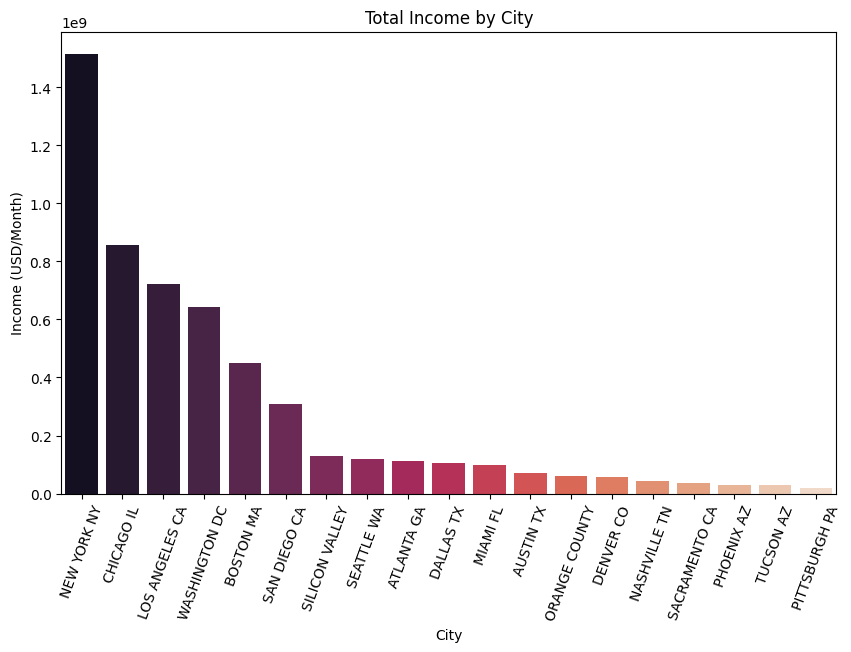

In [ ]:
fig = plt.figure(figsize=(10,6))

group = all_data.groupby('City')['Income (USD/Month)'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x= 'City', y= 'Income (USD/Month)',palette="rocket")
plt.title("Total Income by City")
plt.xticks(rotation=70)

Text(0.5, 1.0, 'Total Population by City')

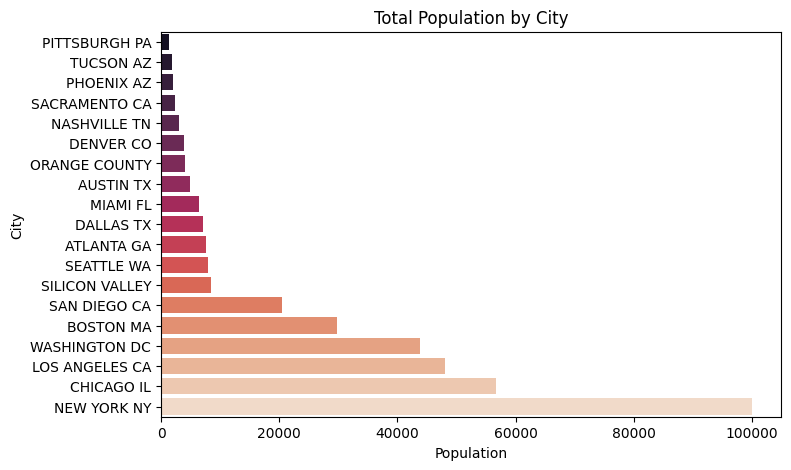

In [ ]:
plt.figure(figsize=(8,5))
population=all_data.groupby("City").agg({"Population":"count"}).sort_values('Population').reset_index()
ax=sns.barplot(data=population, x='Population',y='City', palette="rocket")
plt.title('Total Population by City')


Text(0.5, 1.0, 'Number of Customers in Cities by Company')

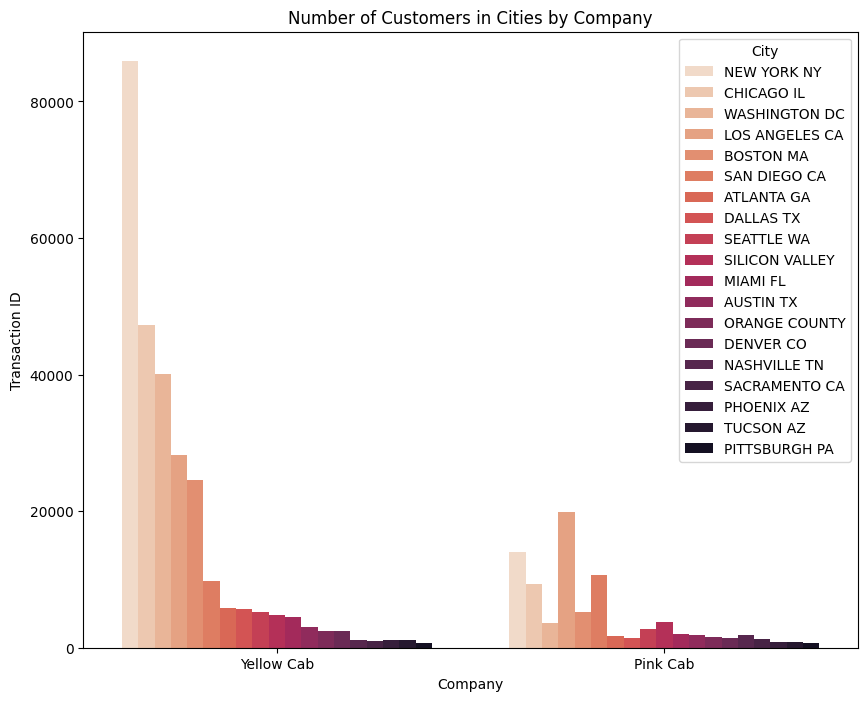

In [ ]:
plt.figure(figsize=(10,8))
group = all_data.groupby(['Company','City'])['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x="Company", hue="City", y='Transaction ID',palette="rocket_r")
plt.title("Number of Customers in Cities by Company")

Text(0.5, 1.0, 'KM Travelled by Company')

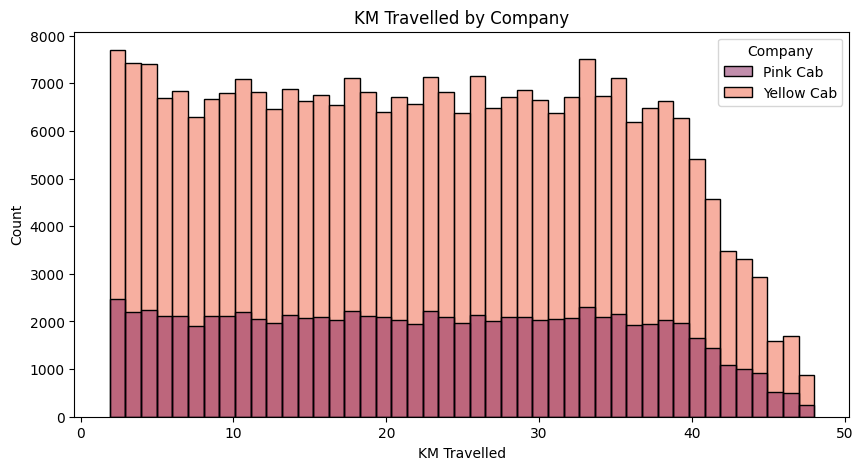

In [ ]:
plt.figure(figsize=(10,5))
#group = all_data.groupby(['Company'])['KM Travelled'].count().sort_values(ascending=False).reset_index()
ax = sns.histplot(data =all_data, x="KM Travelled", hue="Company",bins=45,palette="rocket")
plt.title("KM Travelled by Company")

In [ ]:
x=all_data.groupby(all_data['KM Travelled']==5)['Users'].sum().reset_index()
x

,KM Travelled,Users
0,False,56860859811
1,True,54463531


Text(0.5, 1.0, 'Profit in Cities by Company')

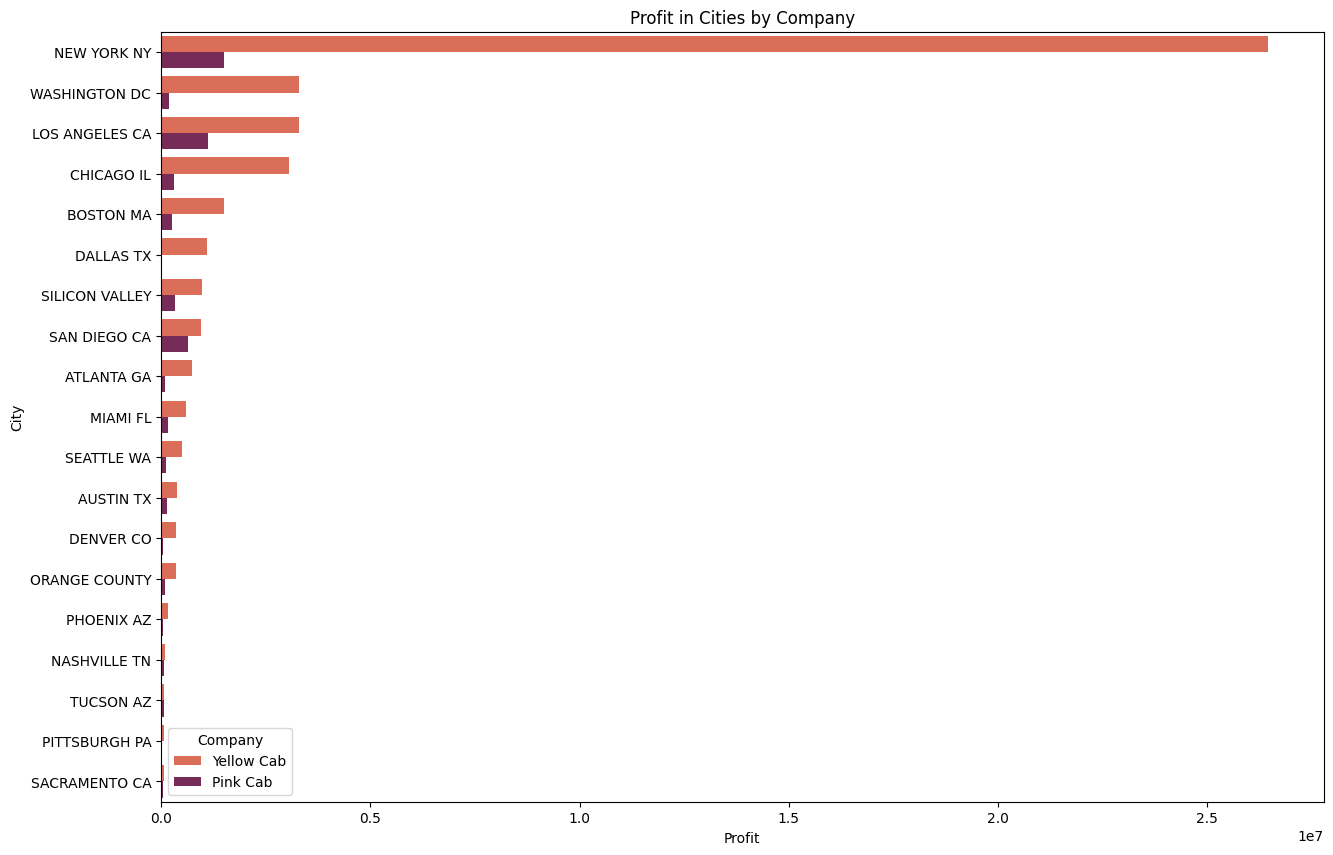

In [ ]:
plt.figure(figsize=(15,10))
group = all_data.groupby(['Company','City'])['Profit'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x='Profit', y="City", hue="Company",palette="rocket_r")
plt.title("Profit in Cities by Company")

In [ ]:
agg_dict = {
    'Transaction ID': 'count' 
}
data_age = all_data.groupby(['Company', 'Gender']).agg(agg_dict).sort_values(by='Transaction ID').reset_index()
data_age.rename({'Company':'label', 'Gender':'Gender', 'Transaction ID': 'count'}, axis=1, inplace=True)
data_age.head()

,label,Gender,count
0,Pink Cab,Female,37480
1,Pink Cab,Male,47231
2,Yellow Cab,Female,116000
3,Yellow Cab,Male,158681


Text(0.5, 1.0, 'Age Distribution by Gender')

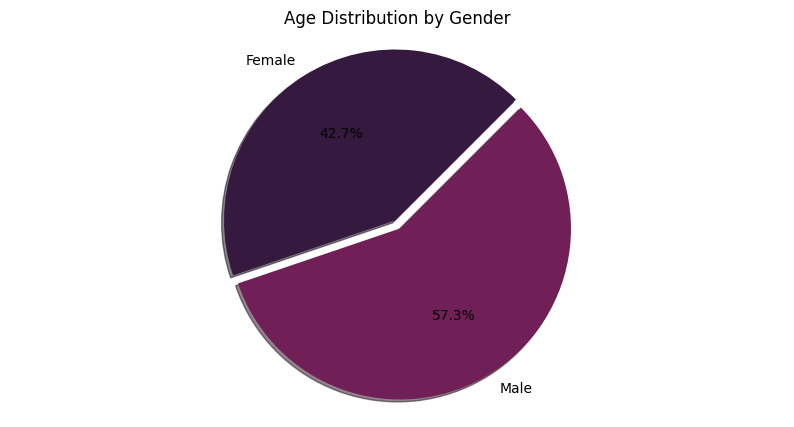

In [ ]:
fig, ax= plt.subplots(figsize=(10,5))

textprops = {"fontsize":10}
explodes = [0.1, 0.01]
group = all_data.groupby(by=['Gender'])['Age'].count().reset_index()
ax.pie(data =group, x='Age', labels="Gender", colors=sns.color_palette("rocket"),radius = 2, 
       explode = explodes, autopct='%1.1f%%', shadow=True, startangle=45 , textprops =textprops)
ax.axis('equal')
ax.set_title("Age Distribution by Gender")




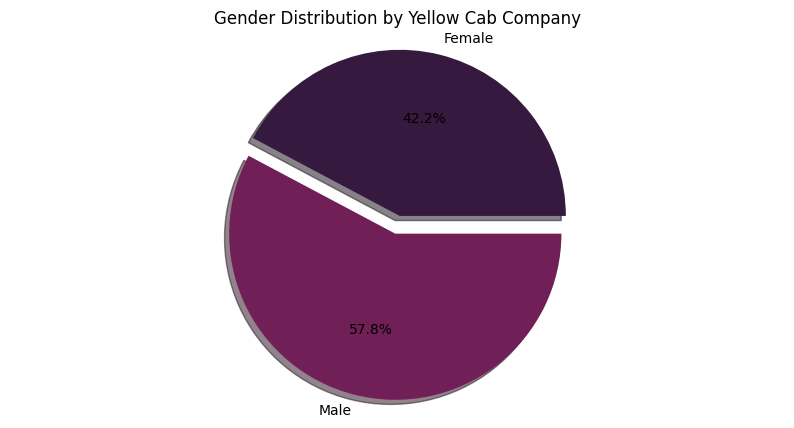

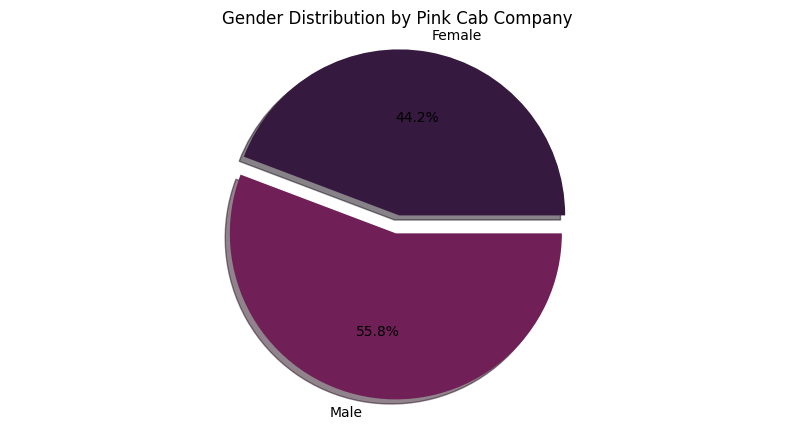

In [ ]:
fig, ax= plt.subplots(figsize=(10,5))


textprops = {"fontsize":10}
explodes = [0.1, 0.01]
data=data_age[data_age['label']=='Yellow Cab']
ax.pie(data =data, x='count', labels="Gender", colors=sns.color_palette("rocket"), 
            explode = explodes, autopct='%1.1f%%', shadow=True,textprops =textprops)
ax.set_title("Gender Distribution by Yellow Cab Company", fontsize=12)
ax.axis('equal')

fig, ax= plt.subplots(figsize=(10,5))
textprops = {"fontsize":10}
explodes = [0.1, 0.01]
data=data_age[data_age['label']=='Pink Cab']
ax.pie(data =data, x='count', labels="Gender", colors=sns.color_palette("rocket"), 
            explode = explodes, autopct='%1.1f%%', shadow=True,textprops =textprops)
ax.set_title("Gender Distribution by Pink Cab Company", fontsize=12)
ax.axis('equal')

plt.show()

In [ ]:
import plotly.express as px
age_counts=all_data['Age'].value_counts()
#age_counts=all_data.groupby(all_data['Company']=='Yellow Cab')['Age'].value_counts()
#age_counts = px.data.gapminder().query("Company == 'Yellow Cab' and year == 2007 and pop > 2.e6")
fig=px.bar(age_counts, title='Age Frequency for Company')
fig.update_layout(xaxis_title='Age',
           yaxis_title='Frequency', title_x=0.5,showlegend=False)
fig.show()

<ipython-input-59-6ff437c9d3f9>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-59-6ff437c9d3f9>:15: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



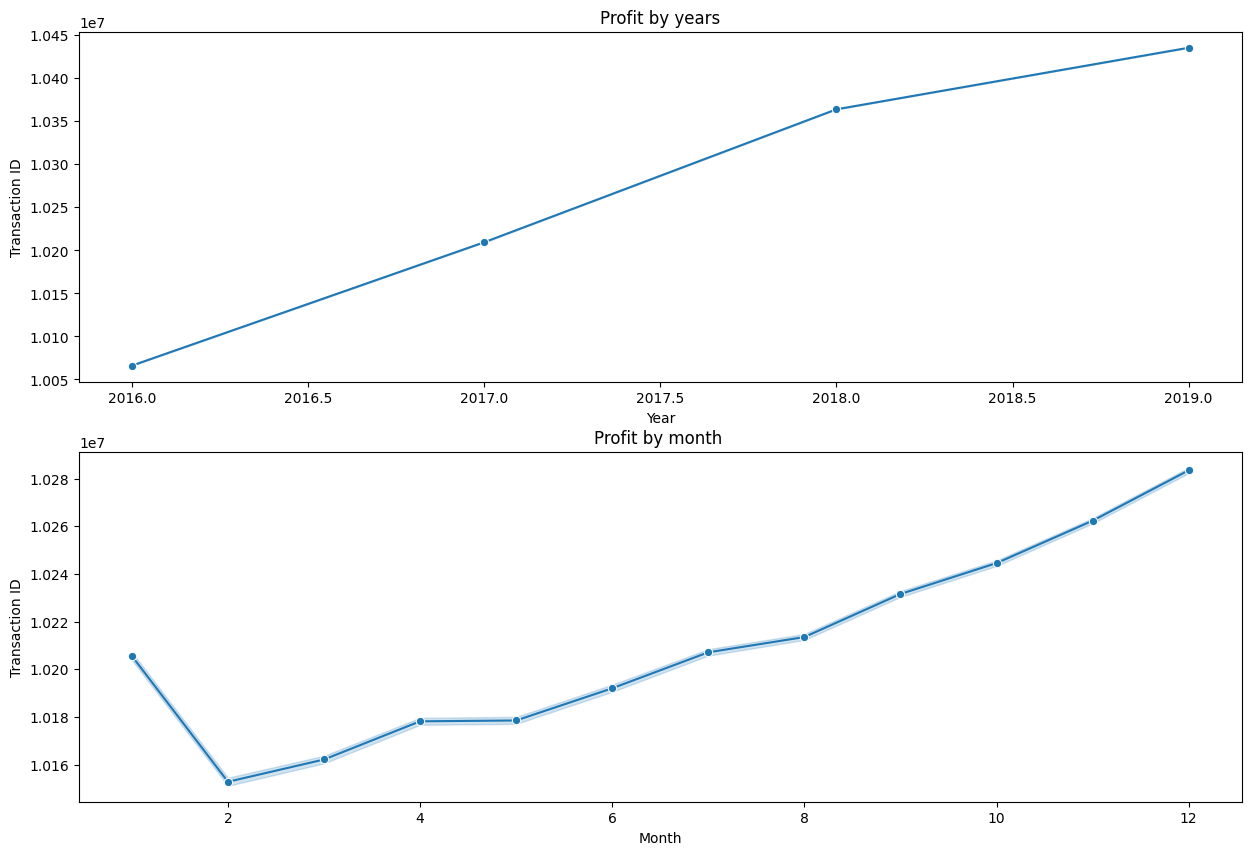

In [ ]:
#Examination of the data set in monthly and annual periods
fig=plt.figure(figsize=(15,10))

fig.add_subplot(2,1,1) 
all_data["Year"] = all_data["Date of Travel"].apply(lambda x: x.year)
plt.title("Profit by years")
#group = all_data.groupby(all_data['Company']=='Pink Cab')['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax=sns.lineplot(data=all_data, x='Year', y='Transaction ID', marker='o',palette="rocket_r")
#ax = sns.barplot(data =group, x=all_data["Year"], y='Transaction ID',palette="rocket_r")

fig.add_subplot(2,1,2)
all_data["Month"] = all_data["Date of Travel"].apply(lambda x: x.month)
plt.title("Profit by month ")
#group = all_data.groupby(all_data['Company']=='Pink Cab')['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax=sns.lineplot(data=all_data, x='Month', y='Transaction ID', marker='o',palette="rocket_r")
#ax = sns.barplot(data =group, x=all_data["Year"], y='Transaction ID',palette="rocket_r")

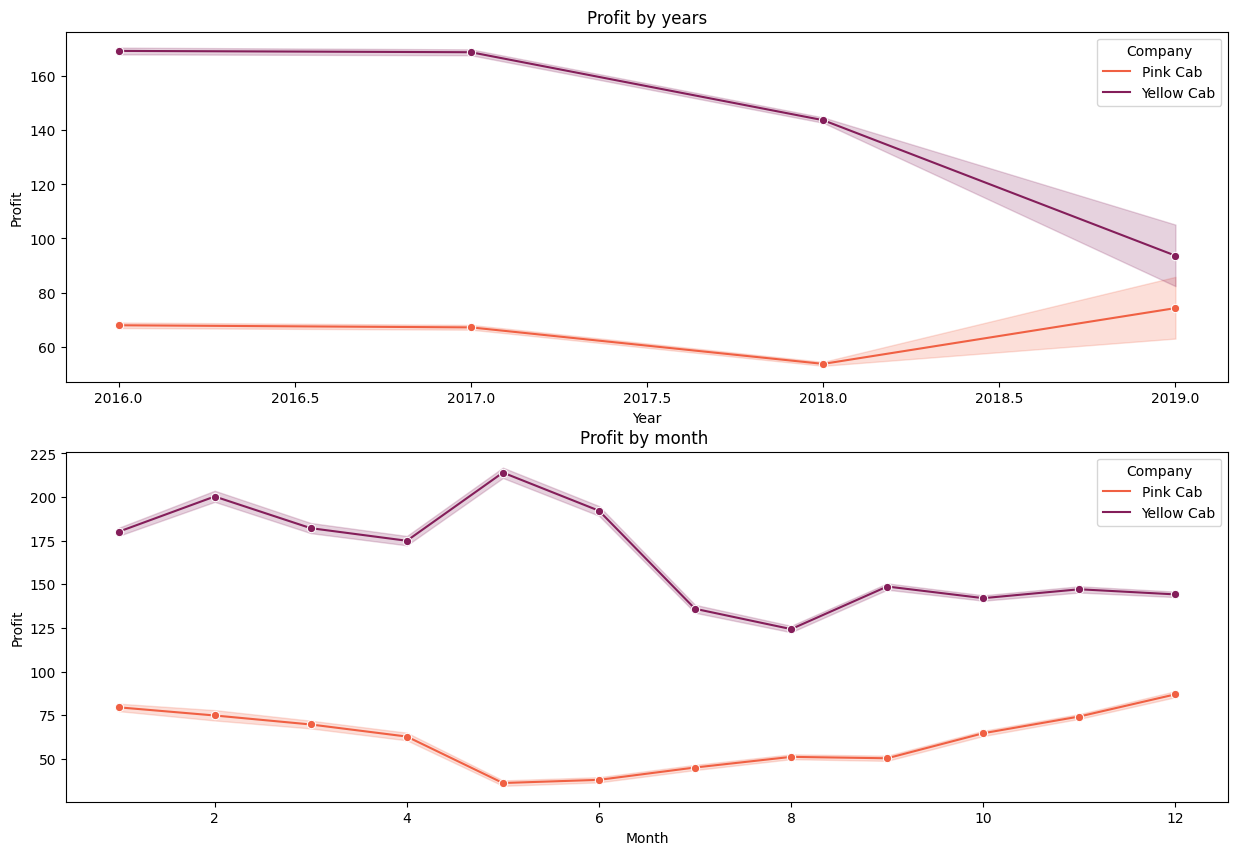

In [ ]:
#Examination of the data set in monthly and annual periods
fig=plt.figure(figsize=(15,10))

fig.add_subplot(2,1,1) 
all_data["Year"] = all_data["Date of Travel"].apply(lambda x: x.year)
plt.title("Profit by years")
#group = all_data.groupby(all_data['Company']=='Pink Cab')['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax=sns.lineplot(data=all_data, x='Year', y='Profit', hue="Company", marker='o',palette="rocket_r")
#ax = sns.barplot(data =group, x=all_data["Year"], y='Transaction ID',palette="rocket_r")

fig.add_subplot(2,1,2)
all_data["Month"] = all_data["Date of Travel"].apply(lambda x: x.month)
plt.title("Profit by month ")
#group = all_data.groupby(all_data['Company']=='Pink Cab')['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax=sns.lineplot(data=all_data, x='Month', y='Profit', hue="Company", marker='o',palette="rocket_r")
#ax = sns.barplot(data =group, x=all_data["Year"], y='Transaction ID',palette="rocket_r")

<Axes: xlabel='Month', ylabel='Customer ID'>

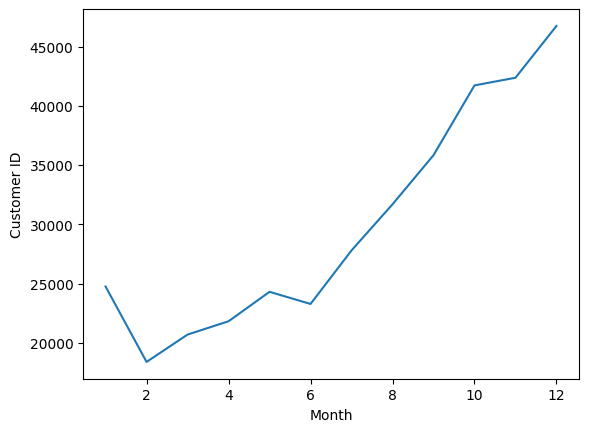

In [ ]:
group = all_data.groupby('Month')['Customer ID'].count().reset_index()
sns.lineplot(data=group, x='Month',y='Customer ID')

<Axes: xlabel='Day', ylabel='Customer ID'>

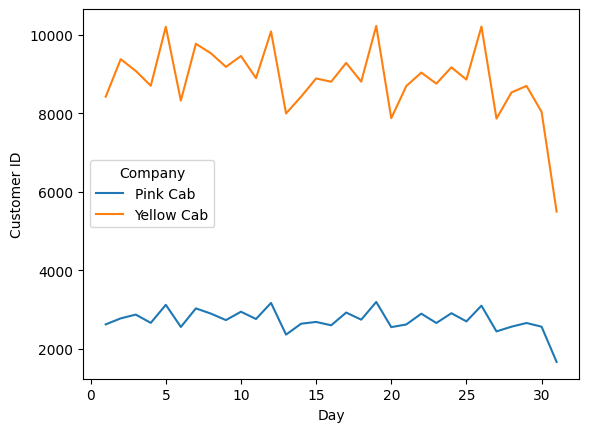

In [ ]:
#Data of Travel
all_data["Day"] = all_data["Date of Travel"].apply(lambda x: x.day)
group = all_data.groupby(['Day','Company'])['Customer ID'].count().reset_index()
sns.lineplot(data=group, x='Day',y='Customer ID', hue='Company')

Text(0.5, 1.0, 'Age Distribution by Company')

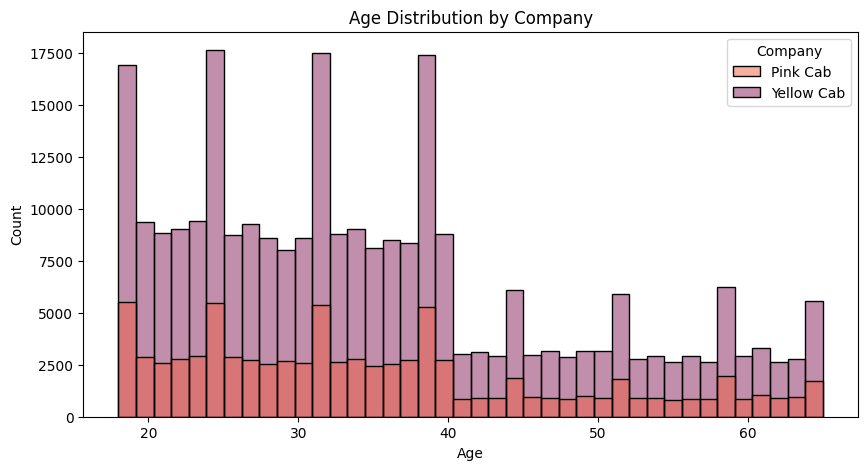

In [ ]:
plt.figure(figsize=(10,5))
#group = all_data.groupby(['Company','Age'])['Customer ID'].sum().sort_values(ascending=False).reset_index()
sns.histplot(data =all_data, x="Age", hue="Company", bins=40, palette="rocket_r")
plt.title("Age Distribution by Company")
#group

In [ ]:
all_data['Year']

0         2016
1         2018
2         2018
3         2016
4         2018
          ... 
359387    2018
359388    2018
359389    2018
359390    2018
359391    2018
Name: Year, Length: 359392, dtype: int64

In [ ]:
#"Average Profit Per KM
profit=all_data.groupby(['Company','Year'])['Profit'].sum().reset_index()
km=all_data.groupby(['Company','Year'])['KM Travelled'].sum().reset_index()
data1=profit['Profit']/km['KM Travelled']
data1=pd.DataFrame(data1)
data1.rename(columns={data1.columns[0]:'Profit'},inplace=True)
data1.loc[:, "Year"] = profit['Year']
data1.loc[:, "Company"] = profit['Company']
group=data1.groupby(['Company','Year'])['Profit'].sum().reset_index()
group

,Company,Year,Profit
0,Pink Cab,2016,3.024160
1,Pink Cab,2017,2.965563
2,Pink Cab,2018,2.374093
3,Pink Cab,2019,3.200222
4,Yellow Cab,2016,7.489302
5,Yellow Cab,2017,7.484665
6,Yellow Cab,2018,6.379079
7,Yellow Cab,2019,4.150689


<ipython-input-66-fd6486135e62>:15: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




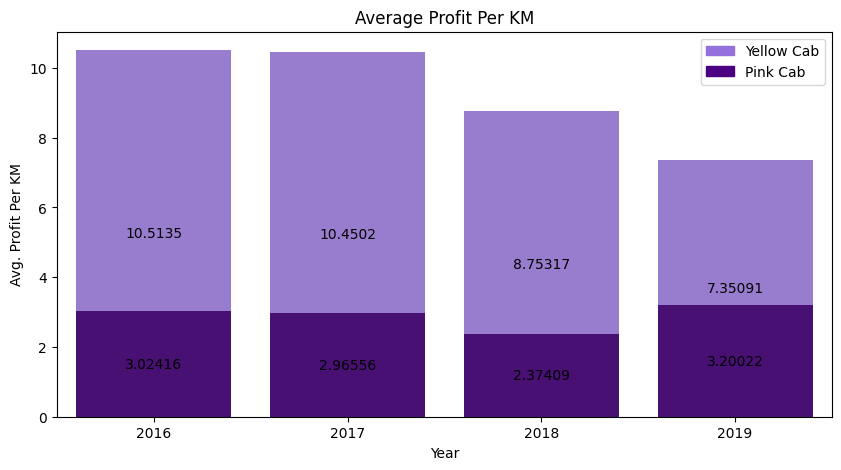

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,5))
#group = all_data.groupby(['Company'])['KM Travelled'].count().sort_values(ascending=False).reset_index()
group=data1.groupby(['Year'])['Profit'].sum().reset_index()
#data = all_data.groupby('KM Travelled').agg(agg_dict).reset_index()

bar1 = sns.barplot(x="Year",  y="Profit", data=group, color='mediumpurple')
#group.plot(kind='barh', x="Year", legend=True)

# take only company=Pink Cab values from the data
company = data1[data1.Company=='Pink Cab']

#bottom bars (group of 'company=Pink Cab')
bar2 = sns.barplot(x="Year", y="Profit", data=company, estimator=sum, ci=None,  color='indigo')

#add legend
top_bar = mpatches.Patch(color='mediumpurple', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='indigo', label='Pink Cab')
plt.legend(handles=[top_bar, bottom_bar])

#add label
bar1.bar_label(bar1.containers[0],label_type='center')
bar2.bar_label(bar2.containers[1],label_type='center')

plt.ylabel("Avg. Profit Per KM")
plt.title("Average Profit Per KM")

# show the graph
plt.show()

<ipython-input-67-a79705c13cf5>:6: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



<Figure size 1000x500 with 0 Axes>

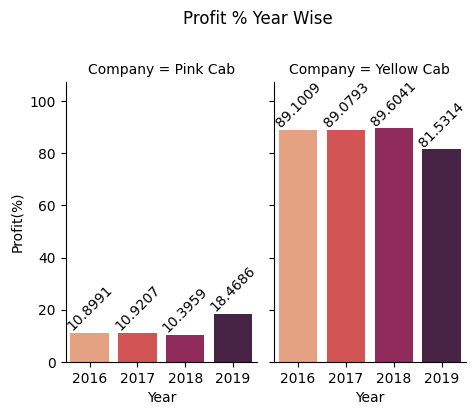

In [ ]:
#Profit % Year
plt.figure(figsize=(10,5))
#data_profit = all_data.groupby(['Company','Year'])['Profit'].sum()
#all_data['percent'] = 100 * all_data['Profit'] / all_data.groupby(['Year'])['Profit'].transform('sum').reset_index()

data =all_data.groupby(['Company', 'Year']).agg({'Profit': 'sum'}).groupby(level=1).apply(lambda x: 100 * x / float(x.sum())).reset_index()
bar=sns.catplot(data=data,
             x="Year", y="Profit", col_wrap=4, palette="rocket_r",
             col="Company", height=4, aspect=.8, kind="bar")

#extract the matplotlib axes_subplot objects from the FacetGri
#ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

#add label
# iterate through the axes containers
for ax in bar.axes.ravel(): 
    for c in ax.containers:
        ax.bar_label(c, label_type='edge',rotation=45)
    ax.margins(y=0.2)

#add title 
bar.fig.subplots_adjust(top=0.80, left = 0.35, wspace = 0.09, bottom = 0.1)
bar.fig.suptitle("Profit % Year Wise")
bar.set_ylabels("Profit(%)")

plt.show()

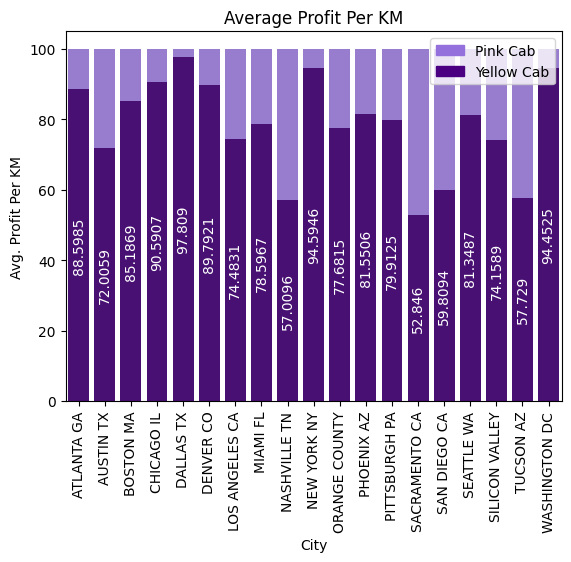

In [ ]:
fig, ax = plt.subplots()


total = all_data.groupby('City')['Profit'].sum().reset_index()
company = all_data[all_data.Company=='Yellow Cab'].groupby('City')['Profit'].sum().reset_index()
company['Profit'] = [i / j * 100 for i,j in zip(company['Profit'], total['Profit'])]
total['Profit'] = [i / j * 100 for i,j in zip(total['Profit'], total['Profit'])]

# top bars (group of 'Company')
bar1 = sns.barplot(x="City",  y='Profit', data=total, color='mediumpurple')

#  bottom bars (group of 'Company=Yellow Cab')
bar2 = sns.barplot(x="City", y="Profit", data=company, color='indigo')

# add legend
top_bar = mpatches.Patch(color='mediumpurple', label='Pink Cab')
bottom_bar = mpatches.Patch(color='indigo', label='Yellow Cab')
plt.legend(handles=[top_bar, bottom_bar])

#add label
bar2.bar_label(bar2.containers[1],label_type='center',rotation=90, color='white')


plt.ylabel("Avg. Profit Per KM")
plt.title("Average Profit Per KM")

plt.xticks(rotation=90)
# show the graph
plt.show()

In [ ]:
company = all_data.groupby([all_data.Company=='Pink Cab','City']).agg({'Profit': 'sum'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
company

<ipython-input-69-e55f087f7ca3>:1: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



,Company,City,Profit
0,False,ATLANTA GA,1.695539
1,False,AUSTIN TX,0.861546
2,False,BOSTON MA,3.422773
3,False,CHICAGO IL,6.970843
4,False,DALLAS TX,2.507937
5,False,DENVER CO,0.810988
6,False,LOS ANGELES CA,7.464672
7,False,MIAMI FL,1.353919
8,False,NASHVILLE TN,0.193655
9,False,NEW YORK NY,60.088270


In [ ]:
#import plotly.express as px
#age_counts=all_data['Year'].value_counts()
#age_counts=all_data.groupby(all_data['Company']=='Yellow Cab')['Age'].value_counts()
#age_counts = px.data.gapminder().query("Company == 'Yellow Cab' and year == 2007 and pop > 2.e6")
#fig=px.bar(all_data, x="Year", color="Company",  title='Age Frequency for Yellow Cab')
#fig.update_layout(xaxis_title='Age',
   #        yaxis_title='Frequency', title_x=0.5,showlegend=False)
#fig.show()

<ipython-input-71-9ea22b2f7606>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



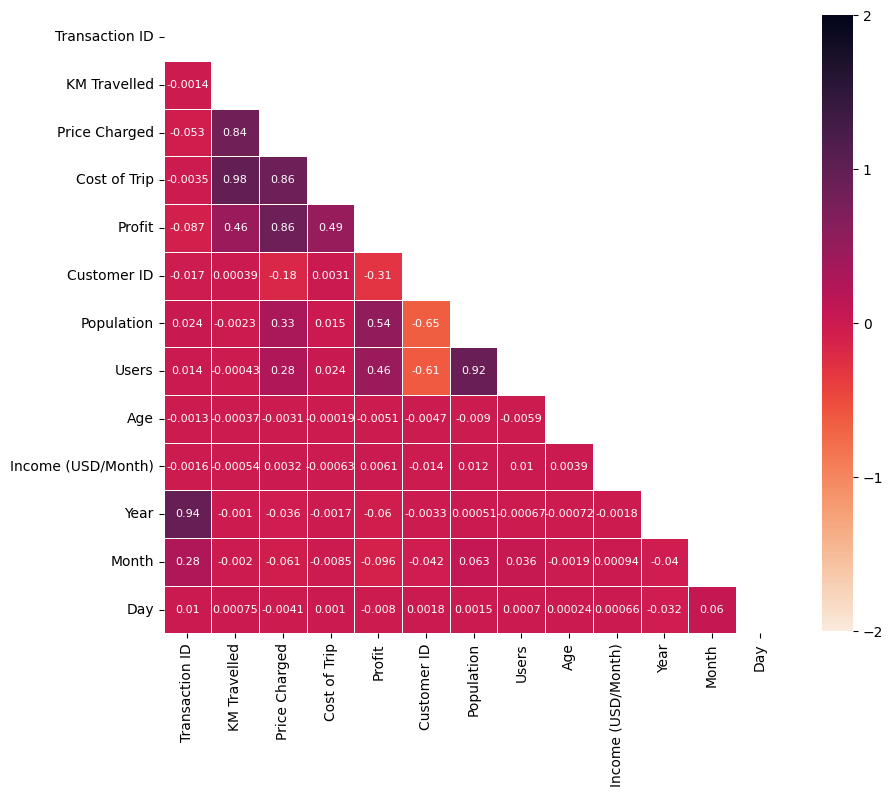

In [ ]:
# Plotting heatmap 
corr=all_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(10, 10)) 
heatmap = sns.heatmap(corr, mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "rocket_r",
                      cbar_kws = {'shrink': .8, 
                                "ticks" : [-2, -1, 0, 1, 2]},
                      vmin = -2, 
                      vmax = 2,
                      annot = True,
                      annot_kws = {"size":8})
# Add the column names as labels
ax.set_yticklabels(corr.columns)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});

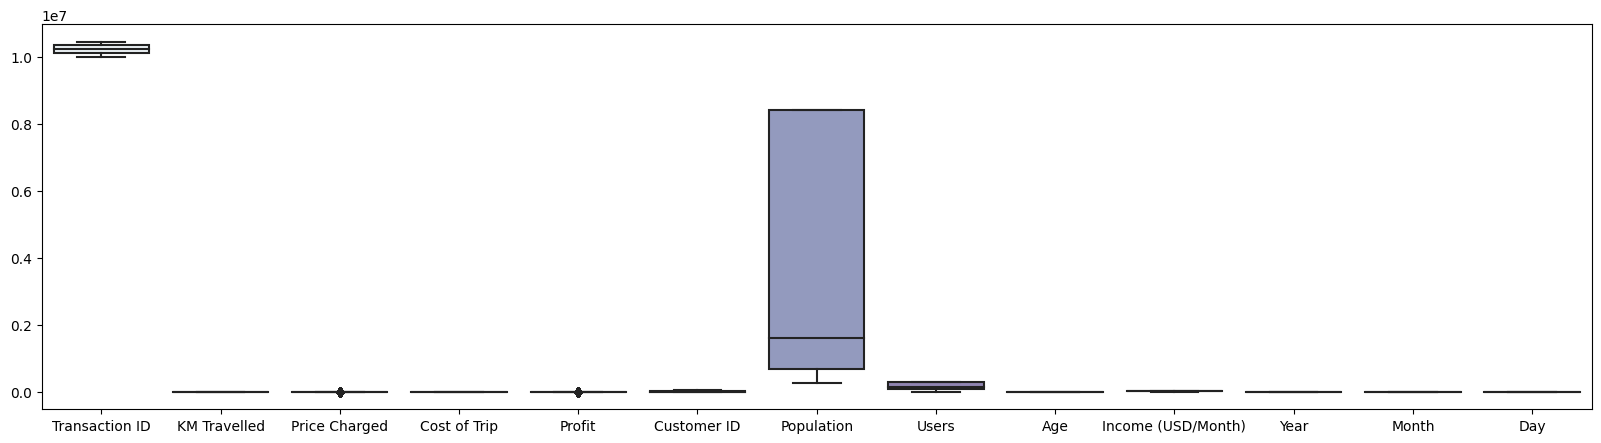

In [ ]:
#outliers values 
plt.figure(figsize=(20,5))
sns.boxplot(data = all_data, palette='BuPu')
plt.show()

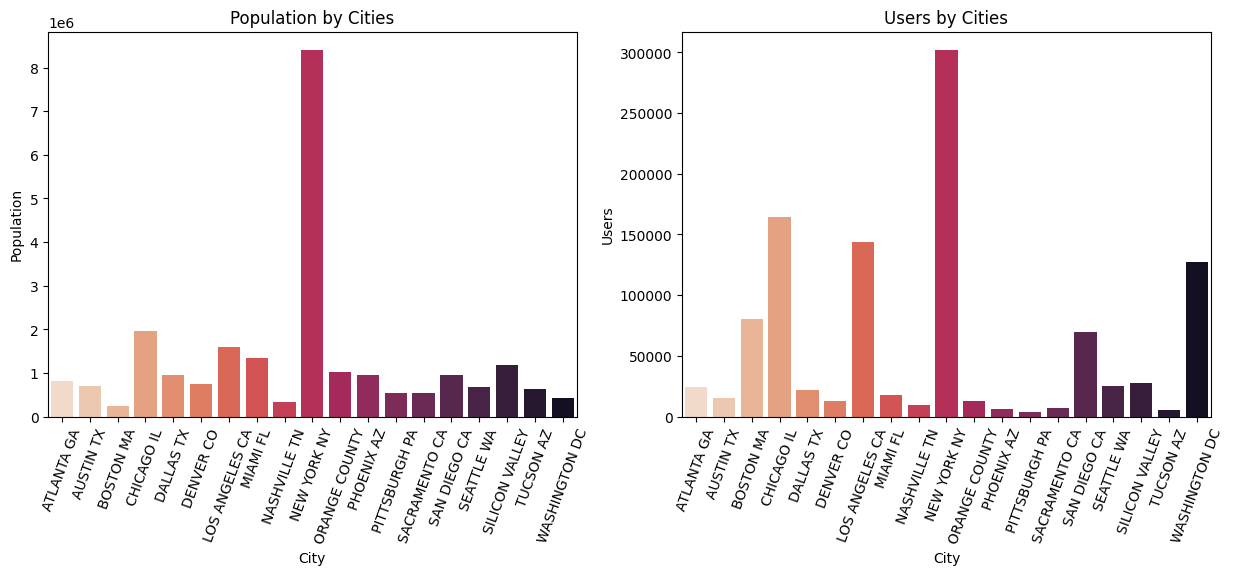

In [ ]:
#Population and Users Comparison by Cities
fig=plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
sns.barplot(x="City", y="Population", data=all_data, palette="rocket_r")
plt.xticks(rotation=70)
plt.title("Population by Cities")

fig.add_subplot(1,2,2)
sns.barplot(x="City", y="Users", data=all_data, palette="rocket_r")
plt.xticks(rotation=70)
plt.title("Users by Cities")

plt.show()


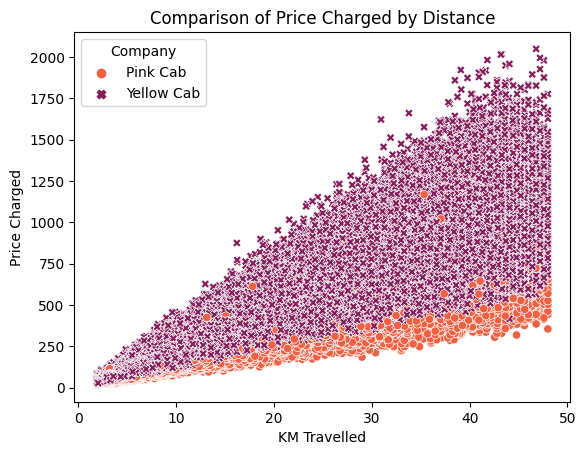

In [ ]:
sns.scatterplot(data=all_data, x='KM Travelled', y='Price Charged', 
                hue='Company',
                style='Company',
                palette='rocket_r')
plt.title('Comparison of Price Charged by Distance')

plt.show()

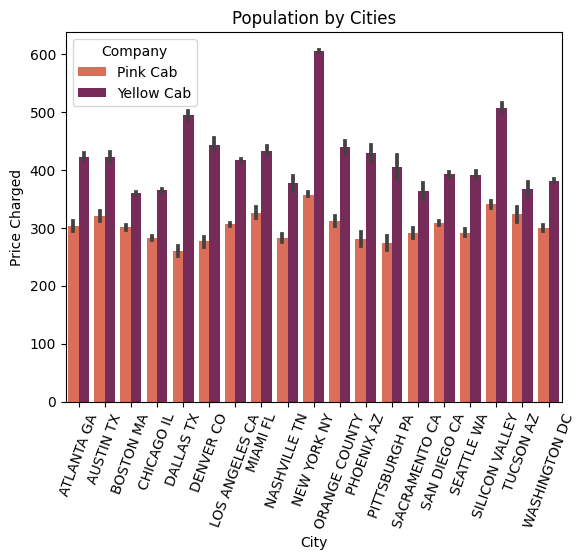

In [ ]:
sns.barplot(x="City", y="Price Charged", hue='Company', data=all_data, palette="rocket_r")
plt.xticks(rotation=70)
plt.title("Population by Cities")

plt.show()

<Figure size 1000x500 with 0 Axes>

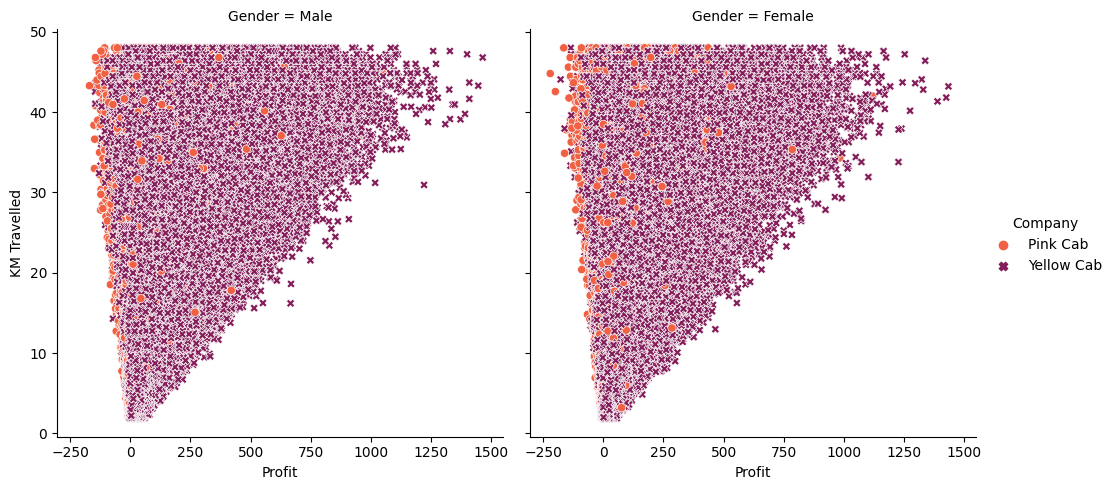

In [ ]:
plt.figure(figsize = (10, 5))
sns.relplot(
    data=all_data, x="Profit", y="KM Travelled",
    col="Gender", hue="Company", style="Company",
    palette='rocket_r',
    kind="scatter"
)

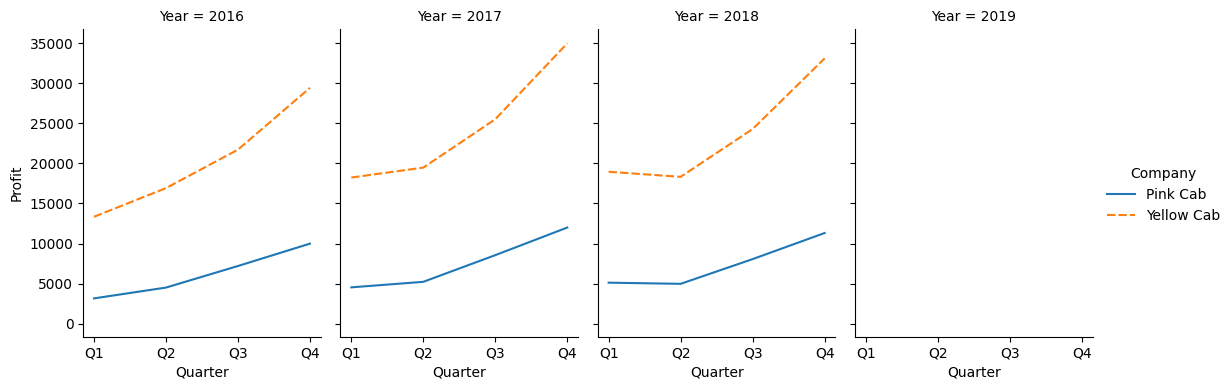

In [ ]:
all_data.loc[all_data['Month']>=1,'Quarter'] = 'Q1'
all_data.loc[all_data['Month']>3,'Quarter'] = 'Q2'
all_data.loc[all_data['Month']>6,'Quarter'] = 'Q3'
all_data.loc[all_data['Month']>9,'Quarter'] = 'Q4'

group = all_data.groupby(['Quarter','Company','Year'])['Profit'].count().reset_index()
#group1=group.groupby('Quarter','Company')['Year'].reset_index()
#sns.lineplot(data=group, x='Quarter',y='Profit', hue='Company')
sns.relplot(
    data=group,
    x="Quarter", y="Profit",
    hue="Company", style="Company", col="Year",
    height=4, aspect=.7, kind="line"
)


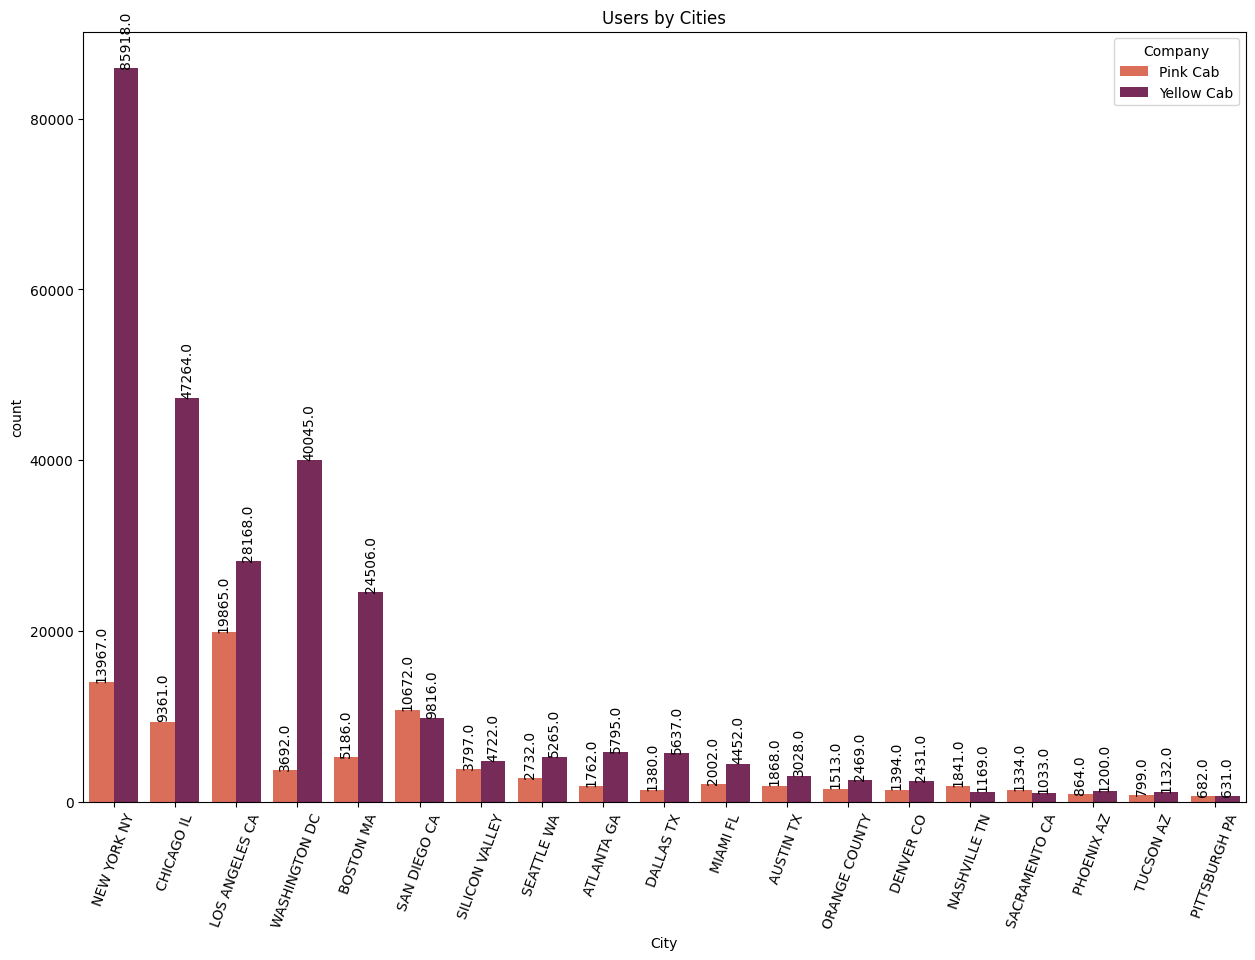

In [ ]:
fig=plt.figure(figsize=(15,10))

#group=all_data.groupby(["City","Company"])[["Users"]].value_counts().reset_index()
ax=sns.countplot(x="City", hue='Company', data=all_data,  order = all_data['City'].value_counts().index,palette="rocket_r")
plt.xticks(rotation=70)
plt.title("Users by Cities")

for c in ax.containers:
    labels = [str(round(v.get_height(),10)) for v in c]
    ax.bar_label(c,rotation=90,
                 labels = labels,
                 size = 10)


**label arangment**
https://onezero.blog/introduction-to-stacked-bar-plot-matplotlib-pandas-and-seaborn-visualization-guide-part-2-2/

# **Hypothesis Tests**

In [ ]:
#t-test
from scipy.stats import ttest_ind

**Hypothesis 1:**

**H0:**Gender has not effect on company profit
 \
**H1:**Gender has effect on company profit 

In [ ]:
agg_dict = {
    'Profit': 'mean'    
}
group1 = all_data.groupby((all_data.Gender=='Male')&(all_data.Company=='Pink Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Gender=='Female')&(all_data.Company=='Pink Cab')).agg(agg_dict)


#group1 = all_data.groupby(all_data[(all_data.Gender=='Male')& (all_data.Company)])['Transaction ID'].Profit.mean()
#group2 = all_data[(all_data.Gender=='Female')&(all_data.Company)].groupby('Transaction ID').Profit.mean()

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'    
}
group1 = all_data.groupby((all_data.Gender=='Male')&(all_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Gender=='Female')&(all_data.Company=='Yellow Cab')).agg(agg_dict)


#group1 = all_data.groupby(all_data[(all_data.Gender=='Male')& (all_data.Company)])['Transaction ID'].Profit.mean()
#group2 = all_data[(all_data.Gender=='Female')&(all_data.Company)].groupby('Transaction ID').Profit.mean()

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


t_statistics: [0.02786795] 
p_value: [0.98029821]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.08386648] 
p_value: [0.94080144]
Reject Alternative Hypothesis(H1)


**Hypothesis 2:**

**H0:**Payment mode has not effect on company profit
 \
**H1:**Payment mode has effect on company profit 

In [ ]:
agg_dict = {
    'Profit': 'mean'    
}
group1 = all_data.groupby((all_data.Payment_Mode=='Cash')&(all_data.Company=='Pink Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Payment_Mode=='Card')&(all_data.Company=='Pink Cab')).agg(agg_dict)


t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'    
}
group1 = all_data.groupby((all_data.Payment_Mode=='Cash')&(all_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Payment_Mode=='Card')&(all_data.Company=='Yellow Cab')).agg(agg_dict)


t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


t_statistics: [-0.03834307] 
p_value: [0.97289731]
Reject Alternative Hypothesis(H1)
t_statistics: [0.17875066] 
p_value: [0.8746019]
Reject Alternative Hypothesis(H1)


**Hypothesis 3:**

**H0:**The variable Year has not a positive correlation with  mileage
 \
**H1:**The variable Year has a positive correlation with  mileage 

In [ ]:
agg_dict = {
    'KM Travelled': 'mean'
      }
group1 = all_data.groupby((all_data.Year==2018)&(all_data.Company=='Pink Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Year==2017)&(all_data.Company=='Pink Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

group1 = all_data.groupby((all_data.Year==2018)&(all_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Year==2017)&(all_data.Company=='Yellow Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

t_statistics: [-0.66243408] 
p_value: [0.57581736]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.42772975] 
p_value: [0.71050085]
Reject Alternative Hypothesis(H1)


**Hypothesis 4:**

**H0:**Age has not effect on company profit
 \
**H1:**Age has effect on company profit 

In [ ]:
agg_dict = {
    'Profit': 'mean'    
}
group1 = all_data.groupby((all_data.Age <= 50)&(all_data.Company=='Pink Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Age > 50)&(all_data.Company=='Pink Cab')).agg(agg_dict)


#group1 = all_data.groupby(all_data[(all_data.Gender=='Male')& (all_data.Company)])['Transaction ID'].Profit.mean()
#group2 = all_data[(all_data.Gender=='Female')&(all_data.Company)].groupby('Transaction ID').Profit.mean()

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'    
}
group1 = all_data.groupby((all_data.Age <= 50)&(all_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Age > 50)&(all_data.Company=='Yellow Cab')).agg(agg_dict)


#group1 = all_data.groupby(all_data[(all_data.Gender=='Male')& (all_data.Company)])['Transaction ID'].Profit.mean()
#group2 = all_data[(all_data.Gender=='Female')&(all_data.Company)].groupby('Transaction ID').Profit.mean()

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


t_statistics: [0.13340069] 
p_value: [0.90608835]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.50355161] 
p_value: [0.66456451]
Reject Alternative Hypothesis(H1)


**Hypothesis 5 :**

**H0:**There is seasonality in the number of customers using the taxi service.
 \
**H1:**There is not seasonality in the number of customers using the taxi service.

In [ ]:
!pip install pymannkendall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymannkendall as mk
customer_data = all_data.groupby('Month')['Customer ID'].count().reset_index()
print(mk.seasonal_test(customer_data,period=12))

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=7.923130374010157e-09, z=5.770085540729481, Tau=0.9090909090909091, s=120.0, var_s=425.3333333333333, slope=1.0, intercept=9196.25)


In [ ]:
all_data_set=all_data.to_csv('all_data.csv')